In [48]:
import pandas as pd
import os
import trimesh
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [14]:
pd.set_option('display.max_columns', None)  # I want to see all columns

# Cleaning original Thingi10K data

My original intetion was to run the simplification algorithm on all 10K meshes of the dataset [Thingi10K](https://ten-thousand-models.appspot.com/). As it is expected I had to make a compromise with how many 3D meshes I can simplify and work with. There are 700 models chosen at random (less than 3MB, another compromise) in the file `data\csv_data\compromise700models.csv` and which will have been run with different hyperparameters of the simplification algorithm. Later I will extract geometric features from them. Now I will work with the original metadata from the Thingi10K dataset excel file. I will:
- Extract these 700 meshes out of the 10K via using a .csv file with the ids of the meshes chosen.
- Clean them: render them in 2 datasets as they are split in 4 (originally an excel [file](https://docs.google.com/spreadsheets/d/1ZM5_1ry3Oe5uDJZxQIcFR6fjjas5rX4yjkhQ8p7Kf2Q/edit?gid=1531775051#gid=1531775051)) and choose the columns I would like to preserve for later analysis. The first dataset will be of the geometric features (I will change some the anmes of the columns maybe) and the second dataset I see as some metadata like tags and other features like name, etc. Why I will do this division of features to geometric and non-geometric? Later I will have another say at least 5 datasets of geometric features of simplified meshes (different runs of threshold and simplification ratio parameter) which don't need to have the non-geometric metadata duplicted in them - they don't change, but the geometric data changes after simplification.
- Save them in new files to work on them later in another notebook


In [30]:
def filter_dataset(big_csv_path, filter_csv_path, output_dir, big_csv_column_name='file_id'):
    """
    Filters a large dataset based on a filter file containing specific IDs and saves the filtered dataset to a new CSV file.

    Parameters:
    big_csv_path (str): Path to the large CSV file that needs to be filtered.
    filter_csv_path (str): Path to the CSV file that contains the filter column (with IDs).
    output_dir (str): Directory where the filtered dataset should be saved.
    big_csv_column_name (str): Column name in the large CSV file that corresponds to the IDs to be filtered. Default is 'file_id'.

    Returns:
    None
    """
    data = pd.read_csv(big_csv_path)
    filter_column = pd.read_csv(filter_csv_path)

    trimmed_data = data[data[big_csv_column_name].isin(filter_column['file_id'])]

    # Prepare the output file name
    base_name = os.path.basename(big_csv_path)
    base_name, ext = os.path.splitext(base_name)
    trimmed_file_name = f"{base_name}_trimmed{ext}"

    os.makedirs(output_dir, exist_ok=True)

    output_file_path = os.path.join(output_dir, trimmed_file_name)
    trimmed_data.to_csv(output_file_path, index=False)

    print(f"Trimmed dataset saved to {output_file_path}")

In [ ]:
filter_csv_path = './../../data/csv_data/compromise700models.csv'
output_dir = './../../data/csv_data/trimmed_Thingi_data'

In [ ]:
filter_dataset('./../../data/csv_data/original_Thingi10K_data/Thingi10K Summary - Geometry Data.csv', filter_csv_path, output_dir)

Trimmed dataset saved to ./../data/csv_data/cleaned_Thingi_data\Thingi10K Summary - Geometry Data_trimmed.csv


In [ ]:
geometric_data = pd.read_csv('./../../data/csv_data/trimmed_Thingi_data/Thingi10K Summary - Geometry Data_trimmed.csv')

In [16]:
geometric_data.head()

,file_id,num_vertices,num_faces,num_geometrical_degenerated_faces,num_combinatorial_degenerated_faces,num_connected_components,num_boundary_edges,num_duplicated_faces,euler_characteristic,num_self_intersections,num_coplanar_intersecting_faces,vertex_manifold,edge_manifold,oriented,total_area,min_area,p25_area,median_area,p75_area,p90_area,p95_area,max_area,min_valance,p25_valance,median_valance,p75_valance,p90_valance,p95_valance,max_valance,min_dihedral_angle,p25_dihedral_angle,median_dihedral_angle,p75_dihedral_angle,p90_dihedral_angle,p95_dihedral_angle,max_dihedral_angle,min_aspect_ratio,p25_aspect_ratio,median_aspect_ratio,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,PWN,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
0,100026,117,270,11,0,1,0,0,-10,41,18,0,0,0,24024.203930,0.000000,22.815921,53.549973,81.231290,174.712597,367.214896,796.682620,3.0,5.0,7.0,8.0,9.4,11.0,13.0,0.0,0.0,0.000000,1.570796,1.570796,1.570796,1.577219,1.105865e+00,2.235257,6.310514,12.165969,46.811937,781.652003,2.893786e+04,0.0,0,88.978533,6.786325,0.687029,4.306460e+02
1,100029,202,452,20,0,2,2,0,-21,78,26,0,0,0,24817.581260,0.000000,14.552595,19.719043,68.799134,124.970832,194.258297,540.671457,3.0,6.0,6.0,7.0,8.9,9.0,15.0,0.0,0.0,0.011179,1.570796,1.570796,1.824603,3.124181,-7.267119e+14,3.448581,5.883755,13.943467,43.728817,236.363485,3.613401e+05,0.0,0,54.906153,6.683168,0.664232,-1.678319e+12
2,100031,310,640,0,0,1,0,0,-10,0,0,0,1,0,4816.206946,0.075679,0.984870,1.160954,7.775173,14.513534,25.345714,107.999175,4.0,5.0,6.0,6.0,8.0,11.0,23.0,0.0,0.0,0.000329,1.570796,1.570796,1.570796,3.140983,1.001693e+00,3.321478,4.097340,53.188379,301.263420,907.033426,1.623939e+06,0.0,0,7.525323,6.193548,0.556337,7.135918e+03
3,100032,1516,3128,2,0,5,0,0,-48,6,0,0,1,0,23660.222680,0.000000,0.739988,1.018892,6.579325,12.415157,36.592744,195.340985,4.0,5.0,6.0,6.0,7.5,9.0,26.0,0.0,0.0,0.000011,1.570796,1.570796,1.570796,3.141075,1.003158e+00,3.660421,5.878338,62.333636,258.575673,767.384013,1.775330e+06,0.0,0,7.564010,6.189974,0.555797,2.068542e+03
4,100075,726,1460,0,0,6,0,0,-4,439,27,1,1,1,70.529079,0.000638,0.007206,0.011511,0.040981,0.144028,0.200000,1.450800,3.0,5.0,5.0,7.0,7.0,9.0,34.0,0.0,0.0,0.000000,1.570796,1.570796,1.570796,3.141593,1.023603e+00,1.699070,2.468472,4.301440,17.433854,45.984571,1.091391e+04,1.0,0,0.048308,6.033058,0.552144,4.345601e+01


## Columns and Their Relevance

### Model Identification
##### `file_id`
- **Preserve**: Yes
- **Relevance**: This is the unique identifier for each model, crucial for referencing and linking data.

### Mesh Complexity
##### `num_vertices`
- **Preserve**: Yes
- **Relevance**: Indicates the complexity of the mesh. Important for analyzing model detail and performance.

##### `num_faces`
- **Preserve**: Yes
- **Relevance**: Indicates the complexity of the mesh. Works in conjunction with `num_vertices`.

##### `num_geometrical_degenerated_faces`
- **Preserve**: Yes
- **Relevance**: Identifies faces that are degenerate in terms of geometry (e.g., zero area). Important for quality analysis.

##### `num_combinatorial_degenerated_faces`
- **Preserve**: Yes
- **Relevance**: Faces that are degenerate in terms of combinatorial properties. Useful for assessing mesh quality.

### Topology and Structure
##### `num_connected_components`
- **Preserve**: Yes
- **Relevance**: Indicates the number of separate mesh components. Useful for identifying models composed of multiple disconnected parts.

##### `num_boundary_edges`
- **Preserve**: Yes
- **Relevance**: Indicates the number of edges that are on the boundary of the mesh. Important for understanding if a mesh is open or has holes.

##### `num_duplicated_faces`
- **Preserve**: Yes
- **Relevance**: Identifies duplicated faces in the mesh. Relevant for cleaning up and optimizing meshes.

##### `euler_characteristic`
- **Preserve**: Yes
- **Relevance**: A topological invariant that is important for understanding the mesh’s shape structure.

##### `num_self_intersections`
- **Preserve**: Yes
- **Relevance**: Identifies self-intersecting geometry. Important for detecting errors or problematic areas in a mesh.

##### `num_coplanar_intersecting_faces`
- **Preserve**: Yes
- **Relevance**: Identifies intersecting faces that are coplanar. Useful for detecting and fixing mesh issues.

##### `vertex_manifold`
- **Preserve**: Yes
- **Relevance**: Indicates whether the mesh is vertex-manifold (i.e., each vertex is shared by a consistent set of faces). Important for mesh integrity.

##### `edge_manifold`
- **Preserve**: Yes
- **Relevance**: Indicates whether the mesh is edge-manifold. Important for mesh integrity.

##### `oriented`
- **Preserve**: Yes
- **Relevance**: Indicates whether the mesh is consistently oriented. Important for determining the correctness of normals and surface properties.

##### `solid`
- **Preserve**: Yes
- **Relevance**: Indicates whether the mesh is solid (i.e., no holes, watertight). Important for ensuring the mesh is suitable for 3D printing or physical simulations.

### Geometric Properties
##### `total_area`
- **Preserve**: Yes
- **Relevance**: The total surface area of the mesh. Essential for size-related analysis.

##### `min_area`, `p25_area`, `median_area`, `p75_area`, `p90_area`, `p95_area`, `max_area`
- **Preserve**: Yes
- **Relevance**: These columns provide statistical information about the distribution of face areas in the mesh. Important for understanding face size distribution and detecting anomalies.

##### `min_valance`, `p25_valance`, `median_valance`, `p75_valance`, `p90_valance`, `p95_valance`, `max_valance`
- **Preserve**: Yes
- **Relevance**: These columns provide statistical information about the valence (number of edges per vertex) in the mesh. Important for understanding mesh regularity and complexity.

##### `min_dihedral_angle`, `p25_dihedral_angle`, `median_dihedral_angle`, `p75_dihedral_angle`, `p90_dihedral_angle`, `p95_dihedral_angle`, `max_dihedral_angle`
- **Preserve**: Yes
- **Relevance**: These columns provide statistical information about the dihedral angles between faces. Useful for understanding the sharpness of edges and overall mesh smoothness.

##### `min_aspect_ratio`, `p25_aspect_ratio`, `median_aspect_ratio`, `p75_aspect_ratio`, `p90_aspect_ratio`, `p95_aspect_ratio`, `max_aspect_ratio`
- **Preserve**: Yes
- **Relevance**: These columns provide statistical information about the aspect ratios of the faces. Important for identifying elongated or skewed faces which might indicate poor mesh quality.

##### `PWN`
- **Preserve**: Optional
- **Relevance**: This might indicate something specific. 'Pwn' is a lot like the sense of 'own' that means "to have power or mastery over (someone)." I don't understand it fully so, I will not keep it.

##### `ave_area`, `ave_valance`, `ave_dihedral_angle`, `ave_aspect_ratio`
- **Preserve**: Yes
- **Relevance**: These columns provide average values for face area, vertex valence, dihedral angle, and aspect ratio. They offer a quick summary of the mesh's geometric properties and are useful for EDA.

### Summary of Columns to Preserve

- **Model Identification**: `file_id`
- **Mesh Complexity**: `num_vertices`, `num_faces`, `num_geometrical_degenerated_faces`, `num_combinatorial_degenerated_faces`
- **Topology and Structure**: `num_connected_components`, `num_boundary_edges`, `num_duplicated_faces`, `euler_characteristic`, `num_self_intersections`, `num_coplanar_intersecting_faces`, `vertex_manifold`, `edge_manifold`, `oriented`, `solid`
- **Geometric Properties**: `total_area`, `min_area`, `p25_area`, `median_area`, `p75_area`, `p90_area`, `p95_area`, `max_area`, `min_valance`, `p25_valance`, `median_valance`, `p75_valance`, `p90_valance`, `p95_valance`, `max_valance`, `min_dihedral_angle`, `p25_dihedral_angle`, `median_dihedral_angle`, `p75_dihedral_angle`, `p90_dihedral_angle`, `p95_dihedral_angle`, `max_dihedral_angle`, `min_aspect_ratio`, `p25_aspect_ratio`, `median_aspect_ratio`, `p75_aspect_ratio`, `p90_aspect_ratio`, `p95_aspect_ratio`, `max_aspect_ratio`, `ave_area`, `ave_valance`, `ave_dihedral_angle`, `ave_aspect_ratio`

These columns should provide a comprehensive overview of the mesh characteristics, making them valuable for EDA and visualization. They cover both the geometric and topological aspects of the mesh, which are crucial for understanding the overall structure and quality of your 3D models.

In [17]:
geometric_data.columns

Index(['file_id', 'num_vertices', 'num_faces',
       'num_geometrical_degenerated_faces',
       'num_combinatorial_degenerated_faces', 'num_connected_components',
       'num_boundary_edges', 'num_duplicated_faces', 'euler_characteristic',
       'num_self_intersections', 'num_coplanar_intersecting_faces',
       'vertex_manifold', 'edge_manifold', 'oriented', 'total_area',
       'min_area', 'p25_area', 'median_area', 'p75_area', 'p90_area',
       'p95_area', 'max_area', 'min_valance', 'p25_valance', 'median_valance',
       'p75_valance', 'p90_valance', 'p95_valance', 'max_valance',
       'min_dihedral_angle', 'p25_dihedral_angle', 'median_dihedral_angle',
       'p75_dihedral_angle', 'p90_dihedral_angle', 'p95_dihedral_angle',
       'max_dihedral_angle', 'min_aspect_ratio', 'p25_aspect_ratio',
       'median_aspect_ratio', 'p75_aspect_ratio', 'p90_aspect_ratio',
       'p95_aspect_ratio', 'max_aspect_ratio', 'PWN', 'solid', 'ave_area',
       'ave_valance', 'ave_dihedral_angle'

In [19]:
geometric_data_cleaned = geometric_data.drop(columns=["PWN"])

In [20]:
geometric_data_cleaned.dtypes

file_id                                  int64
num_vertices                             int64
num_faces                                int64
num_geometrical_degenerated_faces        int64
num_combinatorial_degenerated_faces      int64
num_connected_components                 int64
num_boundary_edges                       int64
num_duplicated_faces                     int64
euler_characteristic                     int64
num_self_intersections                   int64
num_coplanar_intersecting_faces          int64
vertex_manifold                          int64
edge_manifold                            int64
oriented                                 int64
total_area                             float64
min_area                               float64
p25_area                               float64
median_area                            float64
p75_area                               float64
p90_area                               float64
p95_area                               float64
max_area     

I can make these two columns boolean or categorical?

In [21]:
geometric_data_cleaned.oriented.unique()

array([0, 1])

In [22]:
geometric_data_cleaned.solid.unique()

array([0, 1])

In [25]:
geometric_data_cleaned.oriented = geometric_data_cleaned.oriented.astype("category")

In [26]:
geometric_data_cleaned.solid = geometric_data_cleaned.solid.astype("category")

In [27]:
geometric_data_cleaned.dtypes

file_id                                   int64
num_vertices                              int64
num_faces                                 int64
num_geometrical_degenerated_faces         int64
num_combinatorial_degenerated_faces       int64
num_connected_components                  int64
num_boundary_edges                        int64
num_duplicated_faces                      int64
euler_characteristic                      int64
num_self_intersections                    int64
num_coplanar_intersecting_faces           int64
vertex_manifold                           int64
edge_manifold                             int64
oriented                               category
total_area                              float64
min_area                                float64
p25_area                                float64
median_area                             float64
p75_area                                float64
p90_area                                float64
p95_area                                

I think this is it for this dataset of geometric data. Now I will save it and see if there is some interesting metadata in the other datasets related to the meshes to include in another dataset.

In [ ]:
geometric_data_cleaned.to_csv("./../../data/csv_data/cleaned_Thingi_data/geometric_data_Thingi700.csv")

In [ ]:
filter_dataset('./../../data/csv_data/original_Thingi10K_data/Thingi10K Summary - Tag Data.csv', filter_csv_path, output_dir, 'Thing ID')

Trimmed dataset saved to ./../data/csv_data/cleaned_Thingi_data\Thingi10K Summary - Tag Data_trimmed.csv


In [ ]:
tag_data = pd.read_csv('./../../data/csv_data/trimmed_Thingi_data/Thingi10K Summary - Tag Data_trimmed.csv')

In [34]:
tag_data.shape

(15, 2)

In [35]:
tag_data

,Thing ID,Tag
0,111008,ESRA
1,111008,Maestro
2,111008,robot
3,111008,Talking_Robot
4,113865,camera
5,113908,banjo
6,113908,banjo-uke
7,113908,banjolele
8,113908,instrument
9,113908,Makerbot_Orchestra


I guess there is not a lot of tag data for the meshes I have chosen at random, so maybe I will not use any tag data.

In [ ]:
filter_dataset('./../../data/csv_data/original_Thingi10K_data/Thingi10K Summary - Contextual Data.csv', filter_csv_path, output_dir, 'Thing ID')

Trimmed dataset saved to ./../data/csv_data/cleaned_Thingi_data\Thingi10K Summary - Contextual Data_trimmed.csv


In [ ]:
contextual_data = pd.read_csv('./../../data/csv_data/trimmed_Thingi_data/Thingi10K Summary - Contextual Data_trimmed.csv')

In [38]:
contextual_data.shape

(3, 7)

In [39]:
contextual_data

,Thing ID,Date,Category,Sub-category,Name,Author,License
0,111008,2013-06-30T16:06:35,hobby,robotics,1st Printed ESRA Talking Robot,pattonsrobots,Creative Commons - Attribution
1,113865,2013-07-06T17:26:05,gadgets,camera,3DPrinted Camera - Open Reflex,LeoM,Creative Commons - Attribution - Share Alike
2,113908,2013-07-14T22:07:13,hobby,music,Banjo Ukulele (Banjolele),AndreasBastian,Creative Commons - Attribution


Strange that there is not much metadata available for most of the meshes. I guess it depends on the License type and scraping methods? All of them must have names but 

In [ ]:
contextual_data_original = pd.read_csv('./../../data/csv_data/original_Thingi10K_data/Thingi10K Summary - Contextual Data.csv')

No where near 10K. maybe for the ones I have chosen I can use some ML model to add some tags to them?

In [41]:
contextual_data_original.shape

(2010, 7)

Oh, they have written that the models that are from Thingiverse.com are 2,011, so that s why so many don't have tags or any metadata at all. It is too late for me to choose a new subset of models, so I will try to do my best with these 700 models.

The plan: I will generate previews of the meshes and after that feed the previews to a classification model which will give them some tag which I will use.

In [44]:
def generate_mesh_previews(folder_path, output_folder='previews', img_size=(800, 800)):
    """
    Generates 3D mesh previews for OBJ and STL files in a specified folder and saves them as images.

    Parameters:
    folder_path (str): Path to the folder containing 3D mesh files (.obj or .stl).
    output_folder (str): Directory where the generated preview images will be saved. Default is 'previews'.
    img_size (tuple): Size of the output image in pixels (width, height). Default is (800, 800).

    Returns:
    None
    """
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(folder_path):
        if filename.endswith('.obj') or filename.endswith('.stl'):
            file_path = os.path.join(folder_path, filename)
            
            try:
                mesh = trimesh.load(file_path)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                continue

            fig = plt.figure(figsize=(img_size[0]/100, img_size[1]/100))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_box_aspect([1, 1, 1])
            
            # Get mesh vertices and faces for plotting
            ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.faces, mesh.vertices[:, 2], color='white', edgecolor='k')
            ax.axis('off')

            output_file = os.path.join(output_folder, f'{os.path.splitext(filename)[0]}.png')
            plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
            plt.close(fig)

            print(f'Generated preview for {filename}')

In [ ]:
folder_path = './../../data/Thingi10K/raw_meshes/FilteredFiles'

In [ ]:
generate_mesh_previews(folder_path, './../../data/Thingi10K/previews')

Generated preview for 100026.stl
Generated preview for 100029.stl
Generated preview for 100031.stl
Generated preview for 100032.stl
Generated preview for 100075.stl
Generated preview for 100322.stl
Generated preview for 100330.stl
Generated preview for 100331.stl
Generated preview for 100423.stl
Generated preview for 100471.stl
Generated preview for 100478.stl
Generated preview for 100500.stl
Generated preview for 100507.stl
Generated preview for 1005266.stl
Generated preview for 1005268.stl
Generated preview for 1005269.stl
Generated preview for 1005270.stl
Generated preview for 1005272.stl
Generated preview for 1005275.stl
Generated preview for 1005281.stl
Generated preview for 1005285.stl
Generated preview for 1005288.stl
Generated preview for 100638.stl
Generated preview for 100642.stl
Generated preview for 100646.stl
Generated preview for 100678.stl
Generated preview for 100681.stl
Generated preview for 100815.stl
Generated preview for 101168.stl
Generated preview for 101170.stl
G

In [ ]:
img = imread('./../../data/Thingi10K/previews/100026.png')

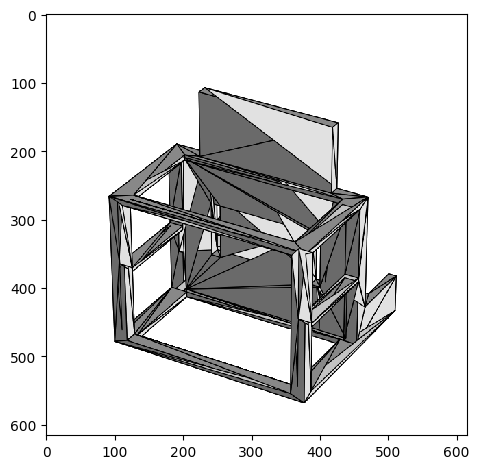

In [51]:
imshow(img)
plt.show()

As I reviewed most of the images, I guess it won't work with the usage of models (at least not from the web) - they are like lego parts for 3D printing. I guess we are left with the geometric metadata and the previews images. Later when the simplified data has done generating, the comparison analysis can begin. For now I will close this notebook as nothing more can be done. The last csv is a summary of the other 3, so I will not collect data from it.